<a href="https://colab.research.google.com/github/bathaee/tensorflow-deep-learning/blob/main/Entanglement_quantification_from_collective_measurements_processed_by_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pip install qutip

In [2]:
import tensorflow as tf
import numpy as np
tf.__version__
#import qutip as qt
#tf.random.set_seed(42)

'2.8.2'

In [3]:
# Create diagonal rho by QuTiP (howerver it is not necessary just remember to use tf.complex128)
#sample_length = 20
#r1 = np.random.uniform(0,1,sample_length)
#r2 = np.random.uniform(0,1,sample_length)
#r3 = np.random.uniform(0,1,sample_length)
#r4 = np.random.uniform(0,1,sample_length)

#rho_0 = tf.zeros([sample_length,4,4], dtype=tf.complex128)
#rho_0_V = tf.Variable(rho_0)

#for i in range(sample_length):
  # r11 = [r1[i],0,0,0]
  # r22 = [0,r2[i]*(1-r1[i]),0,0]
  # r33 = [0,0,r3[i]*(1-r2[i]*(1-r1[i])-r1[i]),0]
  # r44 = [0,0,0,r4[i]*(1-r3[i]*(1-r2[i]*(1-r1[i])-r1[i])-r2[i]*(1-r1[i])-r1[i])]
  # #rho_qt=qt.Qobj([r11,r22,r33,r44]) 
  # #rho_ps = tf.constant(rho_qt) 
  # # or write:
  # rho_ps = tf.constant([r11,r22,r33,r44],dtype=tf.complex128) #rho per sample
  # rho = rho_0_V [i,:,:].assign(rho_ps)

In [4]:
# new Create diagonal rho by QuTiP (howerver it is not necessary just remember to use tf.complex128)

def rho_i(r1,r2,r3,r4): # A diagonal random density matrix
    r11 = [r1,0,0,0]
    r22 = [0,r2*(1-r1),0,0]
    r33 = [0,0,r3*(1-r2*(1-r1)-r1),0]
    r44 = [0,0,0,r4*(1-r3*(1-r2*(1-r1)-r1)-r2*(1-r1)-r1)]
    return tf.constant([r11,r22,r33,r44],dtype=tf.complex128)

  
sample_length = 10000
r1 = np.random.uniform(0,1,sample_length)
r2 = np.random.uniform(0,1,sample_length)
r3 = np.random.uniform(0,1,sample_length)
r4 = np.random.uniform(0,1,sample_length)

rho_i_s = tf.zeros(shape=(sample_length,4,4),dtype=tf.complex128)
rho_i_s_V = tf.Variable(rho_i_s)

for j in range(sample_length):
  rho_i_s_V[j,:,:].assign(rho_i(r1[j],r2[j],r3[j],r4[j]))
   
rho = rho_i_s_V
#rho , rho_i(r1[1],r2[1],r3[1],r4[1])

In [1]:
# Functions which create 6x10 matrices for parameters. 10 is the number of random data of uniform distribution 
def random_param_2pi(s):
    output = [np.random.uniform(0,2*np.pi,s),
              np.random.uniform(0,2*np.pi,s),
              np.random.uniform(0,2*np.pi,s),
              np.random.uniform(0,2*np.pi,s),
              np.random.uniform(0,2*np.pi,s),
              np.random.uniform(0,2*np.pi,s)]
    return (output)
def random_param_half_pi(s):
    output = [np.random.uniform(0,np.pi/2,s),
              np.random.uniform(0,np.pi/2,s),
              np.random.uniform(0,np.pi/2,s),
              np.random.uniform(0,np.pi/2,s),
              np.random.uniform(0,np.pi/2,s),
              np.random.uniform(0,np.pi/2,s)]
    return (output)   
def random_param_zeta(s):
    output = [np.random.uniform(0,1,s),
              np.random.uniform(0,1,s),
              np.random.uniform(0,1,s),
              np.random.uniform(0,1,s),
              np.random.uniform(0,1,s),
              np.random.uniform(0,1,s)]
    return (output)      

In [6]:
# Quantify parameters with above functions
alpha = tf.constant(random_param_2pi(sample_length),dtype=tf.complex128)
psi = tf.constant(random_param_2pi(sample_length),dtype=tf.complex128)
xi = tf.constant(random_param_2pi(sample_length),dtype=tf.complex128)
phi_o = tf.constant(random_param_half_pi(sample_length),dtype=tf.complex128)
phi = tf.constant(np.arcsin(np.sqrt(random_param_zeta(sample_length))),dtype=tf.complex128)

In [7]:
# A function which creates an arbitrary unitary 2x2 matrices according to random parameters i=1...6, j=1...sample_length
def u_little_i(alpha_i,psi_i,xi_i,phi_i):
  ui_11 = np.exp(1j*(np.real(alpha_i.numpy()+psi_i.numpy())))*np.cos(np.real(phi_i.numpy()))
  ui_12 = np.exp(1j*(np.real(alpha_i.numpy()+xi_i.numpy())))*np.sin(np.real(phi_i.numpy()))
  ui_21 = -np.exp(1j*(np.real(alpha_i.numpy()-xi_i.numpy())))*np.sin(np.real(phi_i.numpy()))
  ui_22 = np.exp(1j*(np.real(alpha_i.numpy()-psi_i.numpy())))*np.cos(np.real(phi_i.numpy()))
  u_i = tf.constant([[ui_11,ui_12],[ui_21,ui_22]],dtype=tf.complex128)
  return(u_i)

In [8]:
np.cos(alpha[0,0].numpy()), np.cos(np.real(alpha[0,0].numpy()))

((-0.34560135991194724-0j), -0.34560135991194724)

In [9]:
u_little_i(alpha[0,0],psi[0,0],xi[0,0],phi[0,0])

<tf.Tensor: shape=(2, 2), dtype=complex128, numpy=
array([[ 0.87932281-0.12591511j, -0.31455415-0.33465276j],
       [-0.456473  +0.05068718j, -0.58759962-0.66617557j]])>

In [10]:
# Dagger fuction
def dagger(A):
  A_dagger=tf.math.conj(tf.transpose(A))
  return A_dagger

In [11]:
# Create a diagonal identity matrix with the shape 6x4x4
diagonal1 = np.array([1, 1, 1, 1])
U_0 = tf.cast(tf.linalg.diag(diagonal1),dtype=tf.complex128)
U_0_V = tf.Variable(U_0,dtype=tf.complex128)
UU = tf.zeros(shape=[6,4,4],dtype=tf.complex128)
UU_v = tf.Variable(UU,dtype=tf.complex128) 

for i in range(0,6):
  U0 = UU_v[i].assign(U_0_V)

U0 = tf.cast(U0,dtype=tf.complex128)


# Create unitary matrices with the shape sample_lengthx6x4x4
U = tf.Variable(tf.cast(U0,dtype=tf.complex128)) 
U_sample = tf.zeros(shape=[sample_length,6,4,4])
U_sample_V = tf.Variable(tf.cast(U_sample,dtype=tf.complex128))

for j in range(sample_length):
    U[0,2:4,2:4].assign(u_little_i(alpha[0,j],psi[0,j],xi[0,j],phi[0,j]))
    U[1,1:3,1:3].assign(u_little_i(alpha[1,j],psi[1,j],xi[1,j],phi[1,j]))
    U[2,0:2,0:2].assign(u_little_i(alpha[2,j],psi[2,j],xi[2,j],phi[2,j]))
    U[3,2:4,2:4].assign(u_little_i(alpha[3,j],psi[3,j],xi[3,j],phi[3,j]))
    U[4,1:3,1:3].assign(u_little_i(alpha[4,j],psi[4,j],xi[4,j],phi[4,j]))
    U[5,2:4,2:4].assign(u_little_i(alpha[5,j],psi[5,j],xi[5,j],phi[5,j]))
    U_sample_V[j].assign(U)

# Utotal (Utotal_V) and its dagger (Utotal_star_transpose_V)
Utotal = tf.zeros([sample_length,4,4],tf.complex128)
Utotal_V = tf.Variable(Utotal,tf.complex128)
Utotal_star_transpose = tf.zeros([sample_length,4,4],tf.complex128)
Utotal_star_transpose_V = tf.Variable(Utotal_star_transpose,tf.complex128)
for j in range(sample_length):
  Utotal_V[j].assign(U_sample_V[j,0]@U_sample_V[j,1]@U_sample_V[j,2]@U_sample_V[j,3]@U_sample_V[j,4]@U_sample_V[j,5])
  Utotal_star_transpose_V[j].assign(tf.math.conj(tf.transpose(Utotal_V[j])))

In [12]:
Utotal_V[0]

<tf.Tensor: shape=(4, 4), dtype=complex128, numpy=
array([[-0.33517022-0.78324079j, -0.13400327-0.41868976j,
         0.04315082+0.09533569j,  0.16350809-0.20796878j],
       [ 0.02148162+0.42015215j, -0.22477712-0.66672947j,
        -0.15981406-0.21281946j,  0.49125895+0.12565727j],
       [ 0.06103295+0.27014119j,  0.40590204-0.29668283j,
         0.27497827+0.12991877j, -0.1125774 -0.75190155j],
       [-0.02712178-0.14060094j,  0.12711559+0.20676923j,
        -0.15882339-0.89470646j,  0.09582659-0.29270573j]])>

In [13]:
Utotal_V.shape, Utotal_star_transpose_V.shape, rho.shape

(TensorShape([10000, 4, 4]),
 TensorShape([10000, 4, 4]),
 TensorShape([10000, 4, 4]))

In [14]:
# random density matrix per sample
rho_tot = Utotal_V@rho@Utotal_star_transpose_V
print("A random density matrix is:\n",rho_tot[1])
#Utotal_V[1]
#Utotal_star_transpose_V[1]

A random density matrix is:
 tf.Tensor(
[[ 0.14599242+2.16840434e-19j -0.01270581+8.15486580e-03j
   0.03964634+4.61158012e-02j  0.01080823-1.43683168e-01j]
 [-0.01270581-8.15486580e-03j  0.15893734+6.89823632e-18j
  -0.02317907+2.34198704e-03j -0.00709517+5.04689382e-02j]
 [ 0.03964634-4.61158012e-02j -0.02317907-2.34198704e-03j
   0.10169652+1.35525272e-20j -0.03132114-2.39007464e-02j]
 [ 0.01080823+1.43683168e-01j -0.00709517-5.04689382e-02j
  -0.03132114+2.39007464e-02j  0.22725752-3.41523684e-18j]], shape=(4, 4), dtype=complex128)


In [15]:
rho_tot_star_transpose = dagger(rho_tot[0])

In [16]:
# Partial transpose of rho_tot

rho_tot_partial = tf.cast(tf.zeros(shape=(sample_length,4,4)),tf.complex128)
rho_tot_partial_V = tf.Variable(rho_tot_partial)
#print(rho_tot[0])
rho_tot_partial_V[:,0:2,0:2].assign(rho_tot[:,0:2,0:2])
#print(rho_tot_partial_V[0])
rho_tot_partial_V[:,0:2,2:4].assign(rho_tot[:,2:4,0:2])
#print(rho_tot_partial_V[0])
rho_tot_partial_V[:,2:4,0:2].assign(rho_tot[:,0:2,2:4])
#print(rho_tot_partial_V[0])
rho_tot_partial_V[:,2:4,2:4].assign(rho_tot[:,2:4,2:4])
#print(rho_tot_partial_V[0])
rho_tot_partial_V_s = rho_tot_partial_V
#rho_tot_partial_V_s==rho_tot

In [17]:
# Partial transpose function of a two-qubit matrix

def partial_2(RHO,s):
  rho_partial = tf.cast(tf.zeros(shape=(s,4,4)),tf.complex128)
  rho_partial_V = tf.Variable(rho_partial)
  rho_partial_V[:,0:2,0:2].assign(RHO[:,0:2,0:2])
  rho_partial_V[:,0:2,2:4].assign(RHO[:,2:4,0:2])
  rho_partial_V[:,2:4,0:2].assign(RHO[:,0:2,2:4])
  rho_partial_V[:,2:4,2:4].assign(RHO[:,2:4,2:4])
  return(rho_partial_V)


In [18]:
## eigenvalues of partial transpose of rho
eigenvalues_rho_partial = tf.linalg.eigvals(partial_2(rho_tot,sample_length))
real_eigenvalues_rho_partial = tf.math.real(eigenvalues_rho_partial)
min_real_eigenvalues_rho_partial = tf.reduce_min(real_eigenvalues_rho_partial,axis=1)

Negativity = tf.zeros(shape=sample_length)
Negativity = tf.Variable(Negativity)
for j in range(sample_length):
  if min_real_eigenvalues_rho_partial[j] < 0:
    Negativity[j].assign(-2*min_real_eigenvalues_rho_partial[j].numpy())**2
  else:
    Negativity[j].assign(0)  


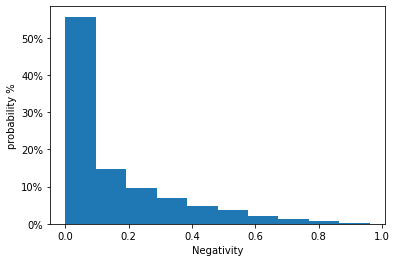

In [19]:
# Plot of distribiution of negativity
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
A = tf.constant(Negativity,tf.float32)
plt.hist(A,10,weights=np.ones(len(A)) / len(A))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("Negativity")
plt.ylabel("probability %")
plt.show()

In [20]:
# SWAP operator
SWAP = tf.constant([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]],tf.complex128)

rho_tot_SWAP = tf.zeros(shape=[sample_length,4,4])
rho_tot_SWAP_V = tf.Variable(tf.cast(rho_tot_SWAP,dtype=tf.complex128))
for j in range(sample_length):
  rho_tot_SWAP_V [j].assign(SWAP@rho_tot[j]@SWAP)

In [ ]:
# tensor product of rho and rho_swap

b = tf.zeros(shape=(sample_length,16,16))
bb = tf.Variable(tf.cast(b,dtype=tf.complex128))
for j in range(sample_length):
  bb = bb[j,0:4,0:4].assign(rho_tot[j]*rho_tot_SWAP_V[j,0,0].numpy())
  bb = bb[j,0:4,4:8].assign(rho_tot[j]*rho_tot_SWAP_V[j,0,1].numpy())
  bb = bb[j,0:4,8:12].assign(rho_tot[j]*rho_tot_SWAP_V[j,0,2].numpy())
  bb = bb[j,0:4,12:16].assign(rho_tot[j]*rho_tot_SWAP_V[j,0,3].numpy())
  bb = bb[j,4:8,0:4].assign(rho_tot[j]*rho_tot_SWAP_V[j,1,0].numpy())
  bb = bb[j,4:8,4:8].assign(rho_tot[j]*rho_tot_SWAP_V[j,1,1].numpy())
  bb = bb[j,4:8,8:12].assign(rho_tot[j]*rho_tot_SWAP_V[j,1,2].numpy())
  bb = bb[j,4:8,12:16].assign(rho_tot[j]*rho_tot_SWAP_V[j,1,3].numpy())
  bb = bb[j,8:12,0:4].assign(rho_tot[j]*rho_tot_SWAP_V[j,2,0].numpy())
  bb = bb[j,8:12,4:8].assign(rho_tot[j]*rho_tot_SWAP_V[j,2,1].numpy())
  bb = bb[j,8:12,8:12].assign(rho_tot[j]*rho_tot_SWAP_V[j,2,2].numpy())
  bb = bb[j,8:12,12:16].assign(rho_tot[j]*rho_tot_SWAP_V[j,2,3].numpy())
  bb = bb[j,12:16,0:4].assign(rho_tot[j]*rho_tot_SWAP_V[j,3,0].numpy())
  bb = bb[j,12:16,4:8].assign(rho_tot[j]*rho_tot_SWAP_V[j,3,1].numpy())
  bb = bb[j,12:16,8:12].assign(rho_tot[j]*rho_tot_SWAP_V[j,3,2].numpy())
  bb = bb[j,12:16,12:16].assign(rho_tot[j]*rho_tot_SWAP_V[j,3,3].numpy())

rho_4 = bb 

In [ ]:
# tensorproduct function of two matrix 
def tensor_pro(sigma1,sigma2):
  d1= len(sigma1[:,0])
  d2= len(sigma2[:,0])
  sigma_out_c = tf.cast(tf.zeros(shape=(d1*d2,d1*d2)),tf.complex128)
  sigma_out = tf.Variable(sigma_out_c,tf.complex128)
  for i in range(d2):
    for j in range(d2):
      sigma_out[i*d1:(i+1)*d1,j*d1:(j+1)*d1].assign(sigma1*(sigma2[i,j].numpy()))
  return tf.constant(sigma_out,tf.complex128)   


# pauli matrix
sigma_0 = tf.constant([[1,0],[0,1]],tf.complex128)
sigma_x = tf.constant([[0,1],[1,0]],tf.complex128)
sigma_y = tf.constant([[0,-1j],[1j,0]],tf.complex128)
sigma_z = tf.constant([[1,0],[0,-1]],tf.complex128)

pi_1 = 1/4*(sigma_0+(1/np.sqrt(3))*(sigma_x+sigma_y+sigma_z))
pi_2 = 1/4*(sigma_0+(1/np.sqrt(3))*(sigma_x-sigma_y-sigma_z))
pi_3 = 1/4*(sigma_0+(1/np.sqrt(3))*(-sigma_x+sigma_y-sigma_z))
pi_4 = 1/4*(sigma_0+(1/np.sqrt(3))*(-sigma_x-sigma_y+sigma_z))

Pi_Bell = 1/4*(tensor_pro(sigma_0,sigma_0)-tensor_pro(sigma_x,sigma_x)-tensor_pro(sigma_y,sigma_y)-tensor_pro(sigma_z,sigma_z))
Pi_Bell_ext = tensor_pro(sigma_0,tensor_pro(Pi_Bell,sigma_0))
I4 = tensor_pro(tensor_pro(tensor_pro(sigma_0,sigma_0),sigma_0),sigma_0)

pi_1_rext =tensor_pro(tensor_pro(tensor_pro(pi_1,sigma_0),sigma_0),sigma_0)
pi_2_rext =tensor_pro(tensor_pro(tensor_pro(pi_2,sigma_0),sigma_0),sigma_0)
pi_3_rext =tensor_pro(tensor_pro(tensor_pro(pi_3,sigma_0),sigma_0),sigma_0)
pi_4_rext =tensor_pro(tensor_pro(tensor_pro(pi_4,sigma_0),sigma_0),sigma_0)
#pi_r = tf.constant([pi_1_rext,pi_2_rext,pi_3_rext,pi_4_rext],tf.complex128)

pi_1_lext =tensor_pro(tensor_pro(tensor_pro(sigma_0,sigma_0),sigma_0),pi_1)
pi_2_lext =tensor_pro(tensor_pro(tensor_pro(sigma_0,sigma_0),sigma_0),pi_2)
pi_3_lext =tensor_pro(tensor_pro(tensor_pro(sigma_0,sigma_0),sigma_0),pi_3)
pi_4_lext =tensor_pro(tensor_pro(tensor_pro(sigma_0,sigma_0),sigma_0),pi_4)
#pi_l = tf.constant([pi_1_lext,pi_2_lext,pi_3_lext,pi_4_lext])

p = tf.zeros(shape=(sample_length,10))
p = tf.Variable(p)
for j in range(sample_length):
  P11 = tf.math.real(tf.linalg.trace(rho_4[j]@pi_1_rext@Pi_Bell_ext@pi_1_lext)/tf.linalg.trace(rho_4[j]@pi_1_rext@I4@pi_1_lext)).numpy()
  p[j,0].assign(P11)
  P22 = tf.math.real(tf.linalg.trace(rho_4[j]@pi_2_rext@Pi_Bell_ext@pi_2_lext)/tf.linalg.trace(rho_4[j]@pi_2_rext@I4@pi_2_lext)).numpy()
  p[j,1].assign(P22)
  P33 = tf.math.real(tf.linalg.trace(rho_4[j]@pi_3_rext@Pi_Bell_ext@pi_3_lext)/tf.linalg.trace(rho_4[j]@pi_3_rext@I4@pi_3_lext)).numpy()
  p[j,2].assign(P33)
  P44 = tf.math.real(tf.linalg.trace(rho_4[j]@pi_4_rext@Pi_Bell_ext@pi_1_lext)/tf.linalg.trace(rho_4[j]@pi_4_rext@I4@pi_4_lext)).numpy()
  p[j,3].assign(P44)
  P13 = tf.math.real(tf.linalg.trace(rho_4[j]@pi_1_rext@Pi_Bell_ext@pi_3_lext)/tf.linalg.trace(rho_4[j]@pi_1_rext@I4@pi_3_lext)).numpy()
  p[j,4].assign(P13)
  P24 = tf.math.real(tf.linalg.trace(rho_4[j]@pi_2_rext@Pi_Bell_ext@pi_4_lext)/tf.linalg.trace(rho_4[j]@pi_2_rext@I4@pi_4_lext)).numpy()
  p[j,5].assign(P24)
  P14 = tf.math.real(tf.linalg.trace(rho_4[j]@pi_1_rext@Pi_Bell_ext@pi_4_lext)/tf.linalg.trace(rho_4[j]@pi_1_rext@I4@pi_4_lext)).numpy()
  p[j,6].assign(P14)
  P12 = tf.math.real(tf.linalg.trace(rho_4[j]@pi_1_rext@Pi_Bell_ext@pi_2_lext)/tf.linalg.trace(rho_4[j]@pi_1_rext@I4@pi_2_lext)).numpy()
  p[j,7].assign(P12)
  P23 = tf.math.real(tf.linalg.trace(rho_4[j]@pi_2_rext@Pi_Bell_ext@pi_3_lext)/tf.linalg.trace(rho_4[j]@pi_2_rext@I4@pi_3_lext)).numpy()
  p[j,8].assign(P23)
  P34 = tf.math.real(tf.linalg.trace(rho_4[j]@pi_3_rext@Pi_Bell_ext@pi_4_lext)/tf.linalg.trace(rho_4[j]@pi_3_rext@I4@pi_4_lext)).numpy()
  p[j,9].assign(P34)

In [ ]:
# training, evaluatin and test dataset
train = sample_length*0.8
train_data = p[:8000].numpy()
eval_data = p[8000:9000].numpy()
test_data = p[9000:].numpy()
train_labels = Negativity[:8000].numpy()
eval_labels = Negativity[8000:9000].numpy()
test_labels = Negativity[9000:].numpy()


In [ ]:
# Artificial Neural Network Features = p Tensorflow(sample_length,10), Labels = Negativity Tensorflow(sample_length)
#random seed
tf.random.set_seed(42)
#create the model
model_entang = tf.keras.Sequential([
                                    tf.keras.layers.Dense(200,activation="relu",kernel_regularizer='l2'),
                                    tf.keras.layers.Dense(150,activation="relu"),
                                    tf.keras.layers.Dense(1, activation="softplus")
])
#compile the model
model_entang.compile(loss="mse",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["mse"])
#fit the model
history = model_entang.fit(train_data,train_labels,epochs=500,validation_data=(eval_data, eval_labels),verbose=0)

In [ ]:
# Artificial Neural Network Features = p Tensorflow(sample_length,10), Labels = Negativity Tensorflow(sample_length)
# random seed
tf.random.set_seed(42)
#create the model
model_entang_lr = tf.keras.Sequential([
                                    tf.keras.layers.Dense(200,activation="relu",kernel_regularizer='l2'),
                                    tf.keras.layers.Dense(150,activation="relu"),
                                    tf.keras.layers.Dense(1, activation="softplus")
])
#compile the model
model_entang_lr.compile(loss="mse",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

#fit the model
history_lr = model_entang_lr.fit(train_data,train_labels,epochs=500,validation_data=(eval_data, eval_labels),
                              callbacks=[lr_scheduler],verbose=0)

In [ ]:
model_entang.summary()

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(title="loss of entangled ANN")
pd.DataFrame(history_lr.history).plot(title="loss of entangled ANN with changable learning rate")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(500)/20))
plt.semilogx(lrs, history_lr.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
model_entang.evaluate(test_data,test_labels)

In [ ]:
Negativity_predict = model_entang.predict(test_data)
test_labels.shape, np.squeeze(Negativity_predict).shape

In [ ]:
#Coefficient of determination R^2
N_preds=tf.constant(np.squeeze(model_entang.predict(p.numpy())))
N_mean = 1/sample_length*tf.reduce_sum(Negativity)
SS_tot = tf.reduce_sum(tf.square(Negativity-N_mean))
SS_res = tf.reduce_sum(tf.square(Negativity-N_preds))
R_2=1-SS_res/SS_tot
R_2

In [ ]:
#Standard deviation
mu = SS_res = 1/sample_length*tf.reduce_sum(Negativity-N_preds)
tau = 1/np.sqrt(sample_length)*tf.sqrt(tf.reduce_sum(tf.square((Negativity-N_preds)-mu)))
tau

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(np.squeeze(Negativity_predict),test_labels)
plt.xlabel("Predicted value of Negativity")
plt.ylabel("Analytical value of Negativity")
plt.title(f"B=10, R^2={R_2:0.03f}, tau={tau:0.03f}")
plt.show();